In [3]:
# Create DataFrame (like an Excel table)
import pandas as pd

data = {
    "Income": [30000, 50000, 70000],
    "Spending": [500, 800, 1200]
}

df = pd.DataFrame(data)
print(df)

   Income  Spending
0   30000       500
1   50000       800
2   70000      1200


In [4]:
# Suppose we have missing data:
data = {
    "Income": [30000, None, 70000],
    "Spending": [500, 800, None]
}

df = pd.DataFrame(data)

# Fix missing values
df["Income"] = df["Income"].fillna(df["Income"].mean())  # Replace NaN with average income
df["Spending"] = df["Spending"].fillna(df["Spending"].median())  # Replace NaN with median spending
print(df)


    Income  Spending
0  30000.0     500.0
1  50000.0     800.0
2  70000.0     650.0


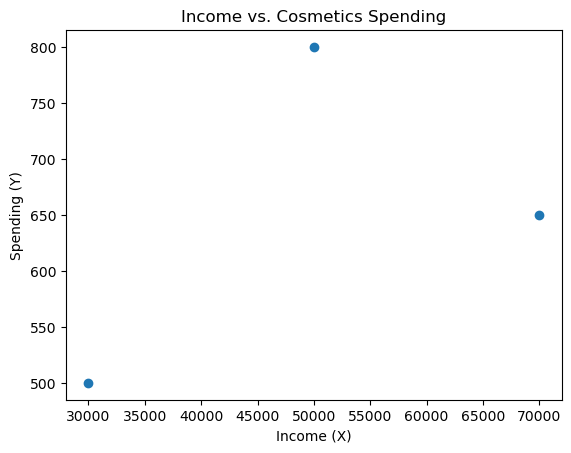

In [5]:
# Example: Plotting Income vs. Spending
import matplotlib.pyplot as plt

plt.scatter(df["Income"], df["Spending"])
plt.xlabel("Income (X)")
plt.ylabel("Spending (Y)")
plt.title("Income vs. Cosmetics Spending")
plt.show()

In [6]:
# Example: Fitting the Model
from sklearn.linear_model import LinearRegression

# Reshape data for sklearn (X must be 2D)
x = df[["Income"]]
y = df["Spending"]

# Train model
model = LinearRegression()
model.fit(x, y)

# Get coefficients (β₀ and β₁)
print(f"Intercept (β₀): {model.intercept_}")
print(f"Slope (β₁): {model.coef_[0]}")

Intercept (β₀): 462.5
Slope (β₁): 0.0037499999999999994


In [7]:
# Example: Calculating MSE
from sklearn.metrics import mean_squared_error

# Predict spending
y_pred = model.predict(x)

# Calculate MSE
mse = mean_squared_error(y, y_pred)
print(f"MSE: {mse:.2f}")

MSE: 11250.00


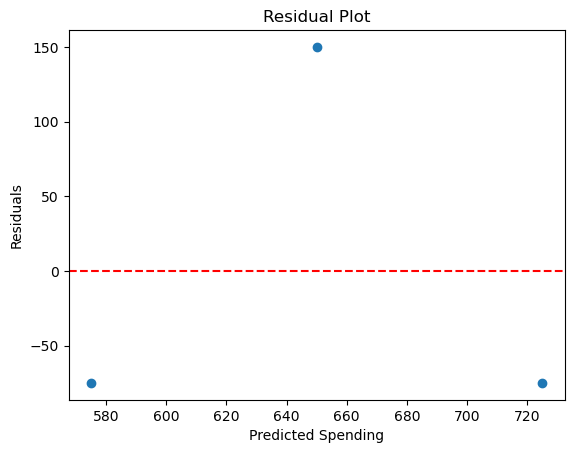

In [8]:
# Example: Residual Plot
residuals = y - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Spending")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

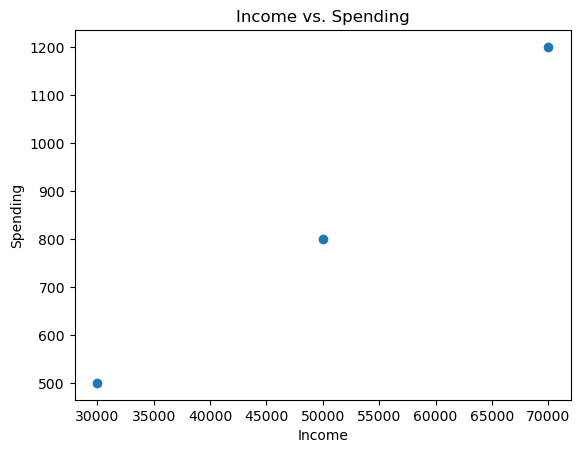

MSE: 555.56


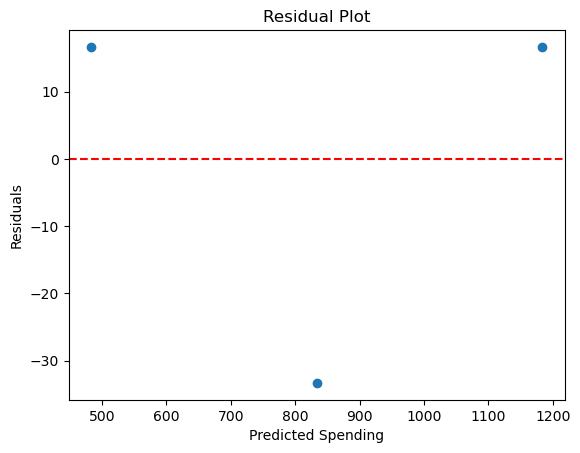

In [9]:
# Appendix: Full Code Example
# Import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# === Step 1: Save your dataset in a data/ folder ===
os.makedirs("data", exist_ok=True)  # Create folder if it doesn't exist

data = {
    "Income": [30000, 50000, 70000],
    "Spending": [500, 800, 1200]
}

df = pd.DataFrame(data)
df.to_csv("data/income_spending.csv", index=False)  # Save to file

# === Step 2: Load data from file ===
df = pd.read_csv("data/income_spending.csv")

# === Step 3: EDA ===
plt.scatter(df["Income"], df["Spending"])
plt.title("Income vs. Spending")
plt.xlabel("Income")
plt.ylabel("Spending")
plt.show()

# === Step 4: Train model ===
x = df[["Income"]]
y = df["Spending"]
model = LinearRegression()
model.fit(x, y)

# === Step 5: Predict & Evaluate ===
y_pred = model.predict(x)
mse = mean_squared_error(y, y_pred)
print(f"MSE: {mse:.2f}")

# === Step 6: Residual Plot ===
residuals = y - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Spending")
plt.ylabel("Residuals")
plt.show()

In [11]:
# Save x and y as files in your notebook, then load in app.py
x.to_csv('x.csv', index=False)
y.to_csv('y.csv', index=False)